# 7 AutoGen - GPT-4o

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

17/06/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import matplotlib.pyplot as plt
import openai
import os
import pandas as pd
import sys

from autogen import Agent, AssistantAgent, ConversableAgent
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.code_utils import content_str
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


In [5]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Example 1

In [6]:
config_list_4v = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4o"],
    },
)

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": [
            "gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314",
            "gpt-4-32k-v0314"
        ],
    },
)

<img src="https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true">

In [7]:
image_agent = MultimodalConversableAgent(
    name="image-explainer",
    max_consecutive_auto_reply=10,
    llm_config={
        "config_list": config_list_4v,
        "cache_seed": None,
        "temperature": 0.5,
        "max_tokens": 300
    },
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    human_input_mode="NEVER",  # Try between ALWAYS or NEVER
    max_consecutive_auto_reply=0,
    code_execution_config={
        "use_docker": False
    },  # Please set use_docker=True if docker is available to run the generated code.
)

# Ask the question with an image
user_proxy.initiate_chat(
    image_agent,
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.""",
)

User_proxy (to image-explainer):

What is this car?
<image>.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

The car in the image is a Ferrari Roma. The Ferrari Roma is a grand touring sports car produced by the Italian automobile manufacturer Ferrari. It features a sleek and modern design with a front-engine, rear-wheel-drive layout, and is known for its powerful performance and luxurious interior.

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': 'What is this car?\n<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.', 'role': 'assistant'}, {'content': 'The car in the image is a Ferrari Roma. The Ferrari Roma is a grand touring sports car produced by the Italian automobile manufacturer Ferrari. It features a sleek and modern design with a front-engine, rear-wheel-drive layout, and is known for its powerful performance and luxurious interior.', 'role': 'user'}], summary='The car in the image is a Ferrari Roma. The Ferrari Roma is a grand touring sports car produced by the Italian automobile manufacturer Ferrari. It features a sleek and modern design with a front-engine, rear-wheel-drive layout, and is known for its powerful performance and luxurious interior.', cost={'usage_including_cached_inference': {'total_cost': 0, 'gpt-4o-2024-05-13': {'cost': 0, 'prompt_tokens': 373, 'completion_tokens': 55, 'total_tokens': 428}}, 'usage_excluding_cached_infe

<img src="https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=true">

In [9]:
# Ask the question with an image
user_proxy.send(
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=trueg>

Make a summary of these cars""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

What is this car?
<image>

Make a summary of these cars

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

Certainly! Here is a summary of the cars:

1. **Ferrari Roma**:
   - **Type**: Grand Touring Sports Car
   - **Design**: Sleek and modern with a front-engine, rear-wheel-drive layout
   - **Performance**: Known for its powerful performance
   - **Interior**: Luxurious and high-quality

2. **BMW X2**:
   - **Type**: Luxury Subcompact SUV
   - **Design**: Sporty with BMW's signature kidney grille
   - **Performance**: Agile handling and dynamic driving characteristics
   - **Interior**: High-quality with advanced technology
   - **Practicality**: Combines performance with practicality in a compact SUV form

Both vehicles represent the pinnacle of their respective categories, offering a blend of performance, luxury, and cutting-edge technology.

-----------

## 2. Example 2

<img src="https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true">

In [10]:
# Ask the question with an image
user_proxy.send(
    message="""Can you describe this image using hashtags and emojis?
<img https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true>

Make a summary""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

Can you describe this image using hashtags and emojis?
<image>

Make a summary

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

Sure! Here is a description of the image using hashtags and emojis:

🌆✨ #Paris2024 #Olympics #EiffelTower #CityOfLight #SunsetVibes #Sports #GlobalEvent #Paris #France 🇫🇷🌍

Summary: The image features the iconic Eiffel Tower in Paris at sunset, with the logo of the Paris 2024 Olympics prominently displayed. The scene captures the beauty of the city and the excitement of the upcoming global sporting event.

--------------------------------------------------------------------------------


## 3. Example 3

In [11]:
class FigureCreator(ConversableAgent):
    def __init__(self, n_iters=2, **kwargs):
        """
        Initializes a FigureCreator instance.

        This agent facilitates the creation of visualizations through a collaborative effort among its child agents: 
        commander, coder, and critics.

        Parameters:
            - n_iters (int, optional): The number of "improvement" iterations to run. Defaults to 2.
            - **kwargs: keyword arguments for the parent AssistantAgent.
        """
        super().__init__(**kwargs)
        self.register_reply([Agent, None],
                            reply_func=FigureCreator._reply_user,
                            position=0)
        self._n_iters = n_iters

    def _reply_user(self, messages=None, sender=None, config=None):
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)
            raise AssertionError(error_msg)
        if messages is None:
            messages = self._oai_messages[sender]

        user_question = messages[-1]["content"]

        # Define the agents
        commander = AssistantAgent(
            name="Commander",
            human_input_mode="NEVER",
            max_consecutive_auto_reply=10,
            system_message="Help me run the code, and tell other agents it is in the <img result.jpg> file location.",
            is_termination_msg=lambda x: x.get("content", "").rstrip(
            ).endswith("TERMINATE"),
            code_execution_config={
                "last_n_messages": 3,
                "work_dir": WORK_DIR,
                "use_docker": False,
            },
            llm_config=self.llm_config,
        )

        critics = MultimodalConversableAgent(
            name="Critics",
            system_message="""Criticize the input figure. How to replot the figure so it will be better?
            Find bugs and issues for the figure.
            Pay attention to the color, format, and presentation. Keep in mind of the reader-friendliness.
            If you think the figures is good enough, then simply say NO_ISSUES""",
            llm_config={
                "config_list": config_list_4v,
                "max_tokens": 300,
                "cache_seed": None
            },
            human_input_mode="NEVER",
            max_consecutive_auto_reply=1,
            # use_docker=False,
        )

        coder = AssistantAgent(
            name="Coder",
            llm_config=self.llm_config,
        )

        coder.update_system_message(
            coder.system_message +
            "ALWAYS save the figure in 'plot.jpg' file. Tell other agents it is in the <img plot.jpg> file location."
        )

        # Data flow begins
        commander.initiate_chat(coder, message=user_question)
        img = Image.open(os.path.join(WORK_DIR, "plot.jpg"))
        plt.imshow(img)
        plt.axis("off")  # Hide the axes
        plt.show()

        for i in range(self._n_iters):
            commander.send(
                message=f"Improve <img {os.path.join(WORK_DIR, 'plot.jpg')}>",
                recipient=critics,
                request_reply=True,
            )

            feedback = commander._oai_messages[critics][-1]["content"]
            if feedback.find("NO_ISSUES") >= 0:
                break
            commander.send(
                message="Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'\n"
                + feedback,
                recipient=coder,
                request_reply=True,
            )
            img = Image.open(os.path.join(WORK_DIR, "final_plot.jpg"))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

        return True, os.path.join(WORK_DIR, "final_plot.jpg")

In [12]:
gpt4_llm_config = {"config_list": config_list_gpt4, "cache_seed": None}

In [13]:
csv_url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"

df = pd.read_csv(csv_url)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [14]:
df.shape

(1461, 6)

In [15]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


User (to Figure Creator~):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 


--------------------------------------------------------------------------------
Commander (to Coder):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 


--------------------------------------------------------------------------------
Coder (to Commander):

In order to fulfill your request, we should follow these steps:

1. Load the CSV file from the URL.
2. Parse the required data (high and low temperatures).
3. Plot the data with the spec

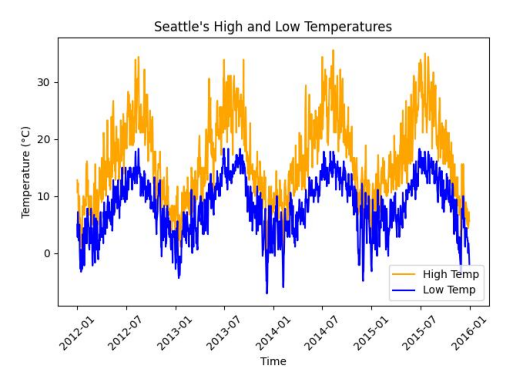

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Critics (to Commander):

To improve the clarity and readability of your plot, consider the following suggestions:

1. **Title and Labels:**
   - Add a more descriptive title.
   - Make the font size of the title and axis labels larger for better readability.
 
2. **Legend:**
   - Move the legend to a less overlapping position, possibly outside the plot area.
   - Increase the font size of the legend for better readability.

3. **Colors:**
   - Choose distinguishable colors that are colorblind-friendly.
   - Lighten the background grid for better contrast.

4. **Axes:**
   - Add grid lines to the y-axis to enhance readability of the temperature variations.
   - Include minor ticks for better resolution.
   
5. **Line Thickness:**
   - Adjust the line thickness to make the lines more distinguishable.

6. **Data Points:**
   - Optionally, add markers or use a lighter 

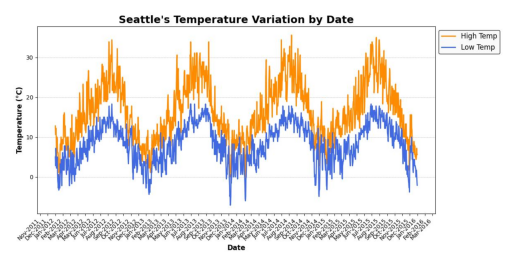

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Commander (to Coder):

Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'
Improve <img workdir/plot.jpg>

--------------------------------------------------------------------------------
Coder (to Commander):

I've examined your feedback, and it seems that you're asking for improvements to the figure, though the specific areas for improvement are not mentioned.

Including the areas that are commonly improved, I'll make changes to the figure:

1. Including minor ticks for better resolution.
2. Further enlarging the font size of the title, legend, and axis labels.
3. Increasing line thickness for better visibility.
4. Applying different shades for the area under the curves to differentiate between high and low temperatures.
5. Further adjusting legend placement if overlaps occur.
6. Increasing figure size for better detail visibi

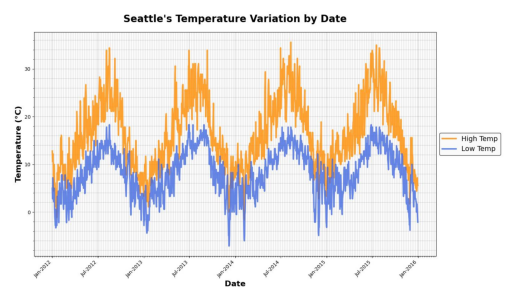

Figure Creator~ (to User):

workdir/final_plot.jpg

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': '\nPlot a figure by using the data from:\nhttps://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv\n\nI want to show both temperature high and low in a chart. The high temperature should be orange, \nthe low temperature should be blue. All the labels should be visible. \n', 'role': 'assistant'}, {'content': 'workdir/final_plot.jpg', 'role': 'user'}], summary='workdir/final_plot.jpg', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [16]:
creator = FigureCreator(name="Figure Creator~", llm_config=gpt4_llm_config)

user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=0,
    code_execution_config={"use_docker": False})

user_proxy.initiate_chat(
    creator,
    message="""
Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 
""",
)

### First plot

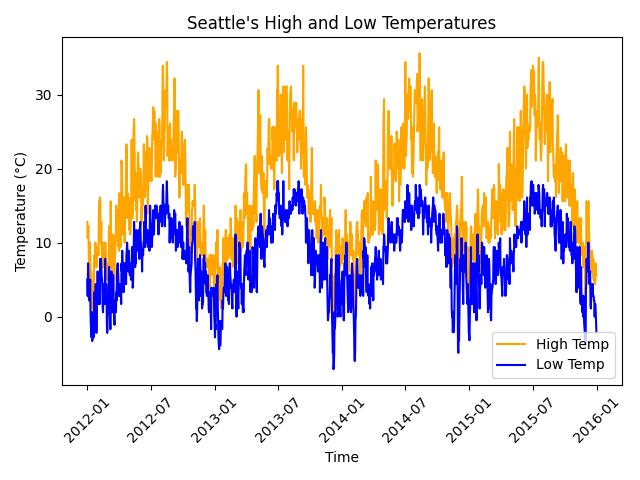

In [17]:
img = Image.open(os.path.join(WORK_DIR, 'plot.jpg'))
img

### Enhanced plot

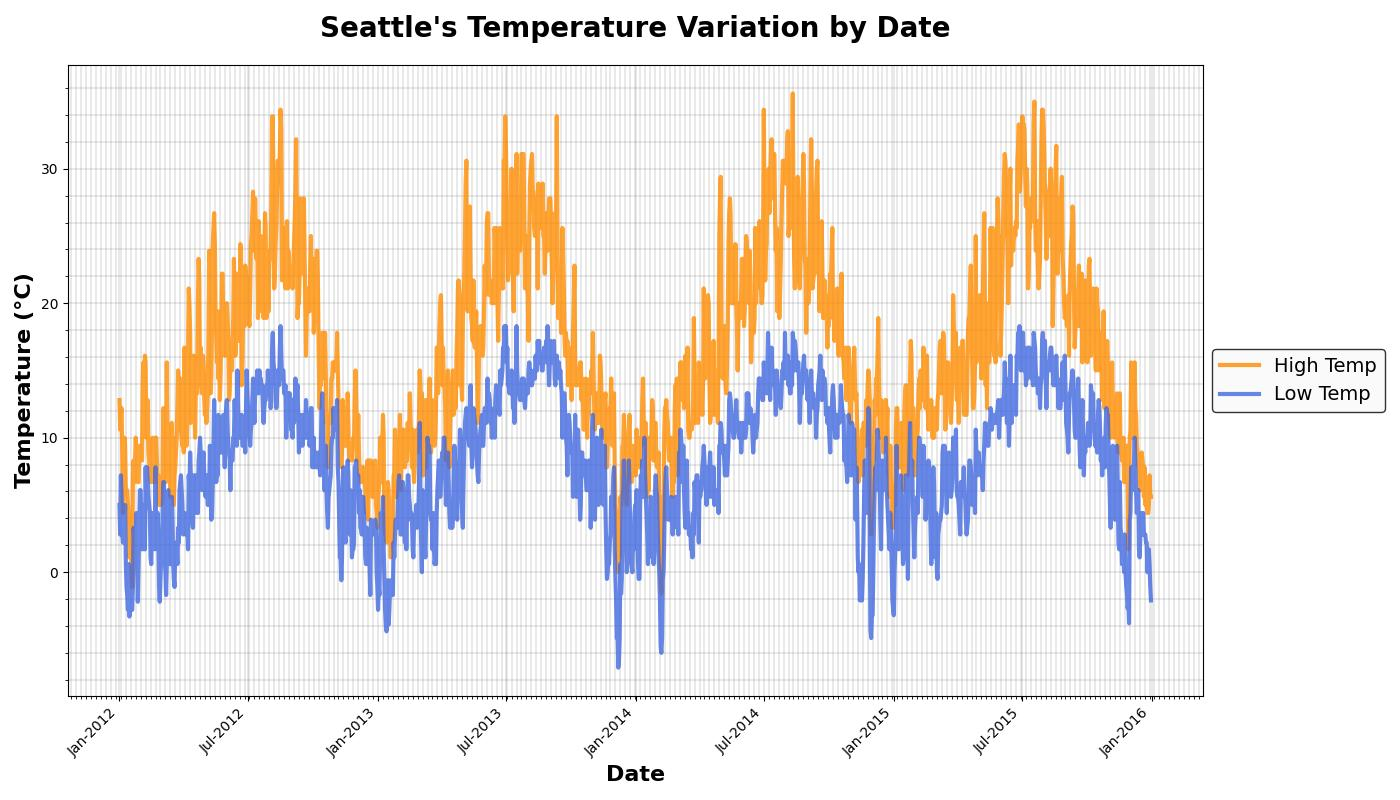

In [18]:
img = Image.open(os.path.join(WORK_DIR, 'final_plot.jpg'))
img

### Both images

In [19]:
def side_by_side_images(imagefile1, imagefile2):
    """
    Side by side images
    """
    # Display images side by side
    image1 = plt.imread(imagefile1)
    image2 = plt.imread(imagefile2)
    # Settings
    NUM_ROWS = 1
    IMGS_IN_ROW = 2
    f, ax = plt.subplots(NUM_ROWS, IMGS_IN_ROW, figsize=(15, 7))
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    ax[0].set_title('1. Initial plot')
    ax[1].set_title('2. Enhanced plot')
    plt.tight_layout()
    plt.show()

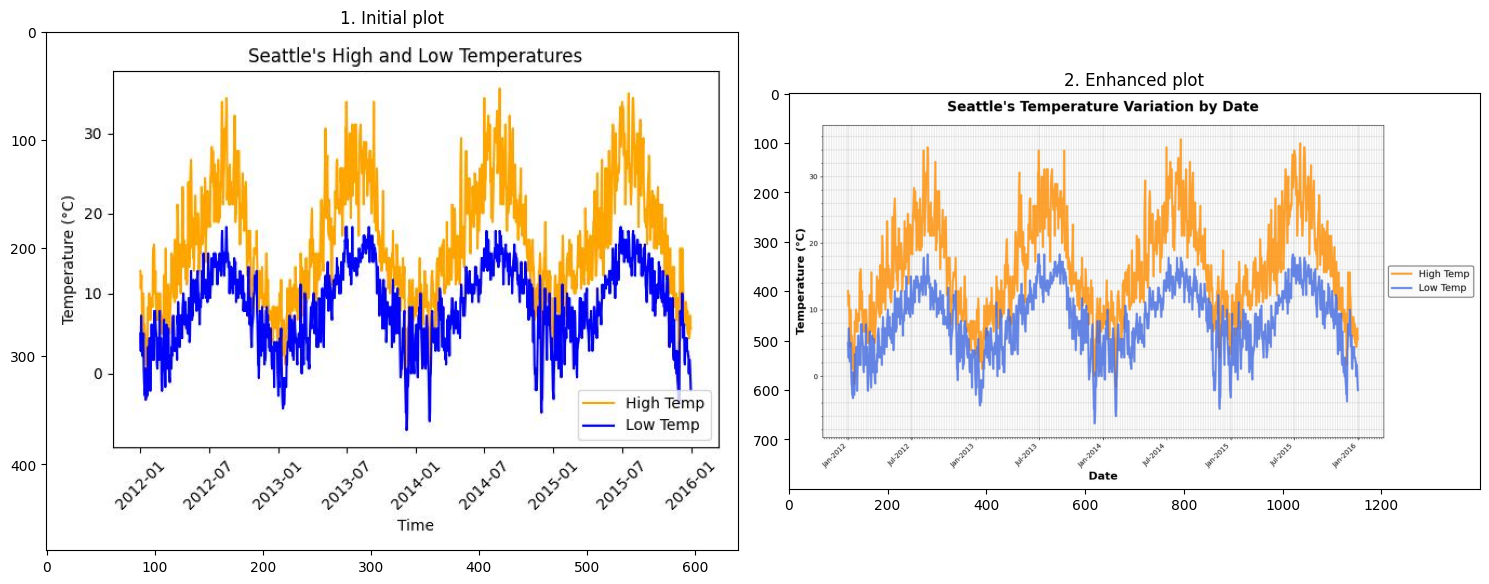

In [20]:
side_by_side_images(
    os.path.join(WORK_DIR, 'plot.jpg'),
    os.path.join(WORK_DIR, 'final_plot.jpg')
)

In [21]:
!ls $WORK_DIR/*.jpg -lh

-rwxrwxrwx 1 root root 168K Jun 17 09:08 workdir/final_plot.jpg
-rwxrwxrwx 1 root root  48K Jun 17 09:06 workdir/plot.jpg
